# What is regression ?

> Modeling problems where the output is a continuous numeric value.


# Linear regression and least squares

A linear regression model will try to predict the single value of the dependent variable $y$ given the independent variable $x$, with the most generic form being: 

$$y = f (x | β), $$

where $x$ corresponds to the input variable(s) and $β$ is an array of parameters.

The simplest linear model we can think of is a line:

$$y = β_0 + β_1 x $$

where $β_0$ and $β_1$ have the usual meaning of intercept and slope of a line. 

Generalizing a bit, for an input vector $x^T = (x_1, x_2, ..., x_N)$,  where $N$ is the total number of observations (or samples), the linear model to predict the real-valued output $y$ is:

$$ f(x) = β_0 + \sum_{i=1}^{N} x_i β_i. $$

To find these parameters we use the Ordinary Least Squares approach, i.e. we try to minimize the residual sum of the squares between the observations and the predictions by the model (i.e. the cost function):

$$ RSS(β) = \sum_{i=1}^{N} (y_i - f(x_i))^2 =  \sum_{i=1}^{N} (y_i - β_0 - x_i β_i)^2 .$$



# Bias - Variance tradeoff

In the previous section we used a linear function to describe a problem. Using the data we can estimate the parameters of the function. However, we **assume** that the underlying function is linear in nature. In reality, when we examine data from physical (e.g. astronomical) problems this assumption may not hold, and a non-linear function may be more appropriate. Consequently we end up with some errors on our predictions. The total error (estimated on the test set) is:

<p style="text-align: center;">Total Error = Variance + Bias$^2$ + Irreducible error,</p>

(for its derivation see [Understanding the Bias-Variance Tradeoff, by Scott Fortmann-Roe](http://scott.fortmann-roe.com/docs/BiasVariance.html) or [Bias–variance tradeoff, Wikipedia](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)) where: 

- **Bias**: is the error introduced by the model's assumptions and it shows how off our model predictions are from the true values - in other words, how well our model represents the problem. <br>
An example of the error imposed by the bias is when we try to fit a non-linear distribution of data with a line. In this case the model has a high bias, so it **underfits** the data.<br>  

- **Variance**: is the error introduced by changing the training set, and reflects how sensitive the model is to the specifics of the training set. <br>In the case that the error (note: on the test set) changes a lot using different training samples then the model has a large variance, so it **overfits**.

- **Irreducible error**: is simply the error that cannot be removed from any model (e.g. the noise of the measurements).

<div style="text-align: center;">
<img src="images/bullseye.png" width=400> 
Figure 3.1. Graphical illustration of bias and variance. <br>
(Credit: <a href="http://scott.fortmann-roe.com/docs/BiasVariance.html"
 target="_blank" rel="noopener noreferrer">Understanding the Bias-Variance Tradeoff, by Scott Fortmann-Roe </a>)
    </img>
    </div>

Ideally, we would like a model to have **both** low bias and variance, i.e. to be accurate and robust. Unfortunately, this is not the case (since we do not know the real function that govers the data) and there is a tradeoff between these two parameters.  

<div style="text-align: center;">
<img src="images/biasvariance.png"> 
Figure 3.2. Bias, variance and total error with complexity. <br>
(Credit: <a href="http://scott.fortmann-roe.com/docs/BiasVariance.html"
 target="_blank" rel="noopener noreferrer">Understanding the Bias-Variance Tradeoff, by Scott Fortmann-Roe </a>)
    </img>
    </div>
    
**High bias models tend to have low variance**. For example, Linear (or Logistic) Regression assumes a simple linear relationship between input data and outcome (high bias) but it is relative robust to the selection of the training sets (low variance). 

**Low bias models tend to have high variance**. For example, a Decision Tree (or k-Nearest Neighbors, or Support Vector Machines) model does not assume a specific relation between the input data and outcome (low bias) but it can easily fully learn each different training set (high variance).

Therefore, our goal is to **minimize the Total Error**, and not necessarily the bias or the variance. 

## Question: How can we achieved this ?
<br>
<details>
<summary>Click for some ideas</summary>
<ul>
    <li>check for correlations (linear regression)
    <li>pre-procesing of data (e.g. scaling)
    <li>test different algortihms or more complex configurations (e.g. bagging, boosting, or automl)
    <li>use cross-validation to optimize hyperparameters (e.g. pruning Decision Trees, finding best k for kNN or C parameters for SVM)
    <li>more data (not always possible...)
    </ul>
    
For linear regression check the next section !


</details>


# Ridge and Lasso regularization 

> Regularization: The application of certain procedures that try to reduce the complexity of a model and avoid overfitting.

In the case of linear regression there is a number of **shrinkage** approaches, where the coefficients $β$ "shrink" or "penalized". 

**Why to do that ?** Because, lower coefficients are less sensitive to changes of the training sample and, consequently, less prone to overfit. Additionally, correlation between variables can lead to poor determination of their coefficients and to high variance. For example, it is possible to find a large positive and a large negative coefficient on two different variables that cancel out. By constraining these we effectively decrease the variance without affecting the prediction error.
 
By taking into account a set of $N$ observations with $p$ features now (advancing slowly to more general and complex problems), the residual sum of squares with the penalty function (i.e. cost function) can be rewritten as:

$$ RSS_{penalized}(β) = \sum_{i=1}^{N} (y_i - f(x_i))^2 + P(β) = \sum_{i=1}^{N} (y_i - β_0 - \sum_{j=1}^{p}x_{ij} β_j)^2 + P(β). $$

**Ridge** 

In this case the penalty is imposed by the absolute square sum of the coefficients (also referred to as L2 regularization). So the modified cost function becomes:   

$$ RSS_{L2}(β) = \sum_{i=1}^{N} (y_i - β_0 - \sum_{j=1}^{p}x_{ij} β_j)^2 + λ \sum_{j=1}^{p} β_j^2. $$

**Lasso**

Similarly, the Lasso (least absolute shrinkage and selection operator) is a penatly imposed by the absolute sum of the coefficients (referred to as L1 regularizaiton). The modified cost function becomes:

$$ RSS_{L1}(β) = \sum_{i=1}^{N} (y_i - β_0 - \sum_{j=1}^{p}x_{ij} β_j)^2 + λ \sum_{j=1}^{p} |β_j|. $$
 
In both cases $λ\geq0$ is a complexity parameter controling the amount of shrinkage (the greater it is the greater the coefficients will shrink). If $λ=0$ then no penatly is enforced and the coefficients become the same to those derived from the Ordinary Least Squares. 

Although both Ridge and Lasso can shrink the coefficients, Lasso can actually remove them by setting some of them to 0. That way it can remove features and work as a sort of feature selection.  

NOTE: $λ$ is a hyperparameter in sklearn (denoted actually as alpha). 

&#9733;  For more details see [Trevor Hastie, Robert Tibshirani, and Jerome Friedman - The Elements of Statistical Learning (2009)](https://hastie.su.domains/ElemStatLearn/).

# On metrics ... or how well can we do

> _Accuracy is a measure for classification not regression_<br>
> _We cannot calculate accuracy for a regression model_
>
>  _by Jason Brownlee [Regression Metrics for Machine Learning](https://machinelearningmastery.com/regression-metrics-for-machine-learning/)_

In regression we are dealing with continuous values. Therefore, it is actually impossible to predict the exact same values. The idea is to get an estimate of how close the predictions are to the expected values.

We are going to refer only a few of the available metrics in [sklearn](https://machinelearningmastery.com/regression-metrics-for-machine-learning/). In the following $y$ refers to the dependent values while $\hat{y}$ to the predicted values.

**--> Mean Squared Error (MSE)**

$$ MSE = \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y_i})^2 $$  

It is actually the cost function of the Ordinary Least Squares (check $RSS(β)$ above). The units returned in this case are squared. Best score is 0.

**--> Root Mean Squared Error (RMSE)**

$$ RMSE = \sqrt{ \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y_i})^2 } $$  

It returns the square root of MSE so that the units match the units of the target value (so better interpretation).  Best score is 0.

**--> Mean Absolute Error (MAE)**

$$ MAE = {1 \over N}\sum_i^N{|  y_i-\hat{y_i} |}$$  

It is less sensitive to large errors when compared to (R)MSE. The score is in units of the target value and the best 

> Comment: Although arithetically the best scores for (R)MSE and MAE is 0 this cannot be the case in real-life problems. Instead a baseline model has to be determined and calculate its score. Then, any model that can achieve a score better that the baselie model is accepted as a skilful model.  


**--> R^2 (coefficient of determination)**

$$R^2 = 1 - {\sum_{i=1}^N{(y_i-\hat{y_i})^2} \over \sum_{i=1}^N{(y_i - \bar{y})^2}}, $$ 

where $\bar{y} = \frac{1}{n}\sum_{i=1}^N y_i$. 

It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 


# Example of Linear Regression with Ridge and Lasso

This is a slightly modified version of a [sklearn example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html#sphx-glr-auto-examples-linear-model-plot-ols-ridge-variance-py). 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


> Running ols with LinearRegression()
> Running ridge with Ridge(alpha=0.1)
> Running lasso with Lasso(alpha=0.01)


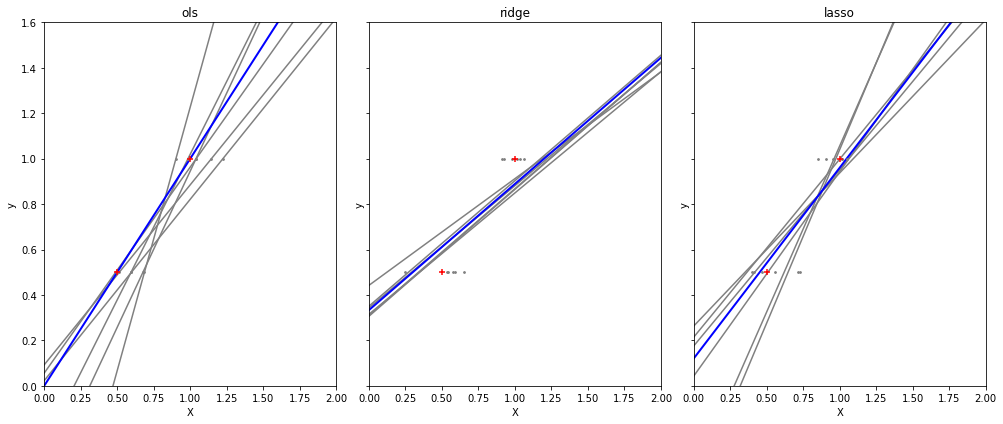

In [10]:
X_train = np.c_[0.5, 1].T
y_train = [0.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(
    ols=LinearRegression(), ridge=Ridge(0.1), lasso=Lasso(0.01)
)

fig, axes = plt.subplots(1,3, sharey=True, figsize=(14,6))

for k, ax in enumerate(axes.reshape(-1)):
    name = list(classifiers.keys())[k]
    clf = list(classifiers.values())[k]
    print(f'> Running {name} with {clf}')

    for _ in range(6):
        this_X = 0.1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color="gray")
        ax.scatter(this_X, y_train, s=3, c="gray", marker="o", zorder=10)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    ax.plot(X_test, y_pred, linewidth=2, color="blue")
    ax.scatter(X_train, y_train, s=30, c="red", marker="+", zorder=10)
    
#     mse = mean_squared_error(y_test, y_pred, squared=True)
#     mae = mean_absolute_error(y_test, y_pred)
#     r2s = r2_score(y_test, y_pred)
    
#     scores = f"MSE:{mse:0.3f}\n MAE:{mae:0.3f}\n $R^2$:{r2s:0.3f}"
    
#     ax.text(1.25,0.4, scores)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel("X")
    ax.set_ylabel("y")

fig.tight_layout()

plt.show()

## Question: What do you notice? 
<br>
<details>
<summary>Click for answer</summary>
Due to the few points the OLS fits vary a lot (high variance). Every line’s slope is way different because the small number of points make the model very sensitive to the training sample.

On the contraty Ridge and Lasso can effectively overcome the limitations of the OLS and provide robust results. The slope of the prediction is much more stable and the variance in the line itself is greatly reduced, in comparison to that of the standard linear regression.

Note: Ridge is more effective in this case, and if you increase a lot the alpha hyperparameter you will see that Lasso drives most of the coefficients to 0.
</details>



# Application 1: HECATE

We will use data derived from the Heraklion Extragalactic Catalogue (HECATE; [Kovlakas et al, 2021](https://ui.adsabs.harvard.edu/abs/2021MNRAS.506.1896K/abstract)) which is an all-sky galaxy catalogue, containing about 200k galaxies (up to z=0.047, D≲200Mpc), and it offers positions, sizes, distances, morphological classifications, star formation rates, stellar masses, metallicities, and nuclear activity classifications. In particular, we are going to use the data for velocity and distance in order to replicate Figure 3 from the paper and fit it with linear regression models

## Linear approach

In [11]:
dfile = "data/HECATE_V_D.csv"

data = np.genfromtxt(dfile, dtype=None, 
                     comments='#', delimiter=',', 
                     names=True, autostrip='Yes',
                     unpack=True )
#examine data
print("Let us see what we have:\n")
print("The column names:")
print(data.dtype.names)
print("-"*25)

Let us see what we have:

The column names:
('PGC', 'OBJNAME', 'V', 'V_VIR', 'MOD', 'MOD_ERR', 'D', 'D_ERR')
-------------------------


/home/grigoris/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


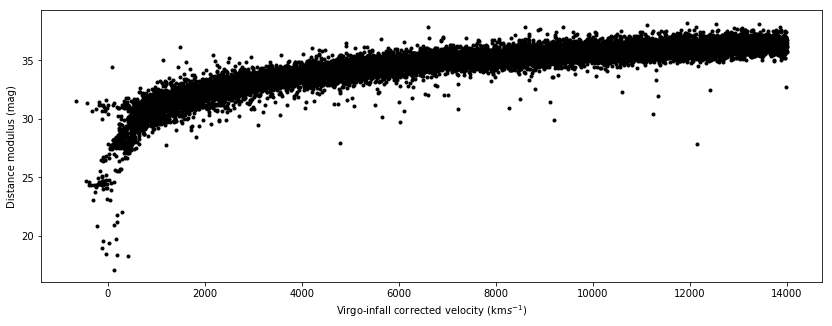

In [45]:
def pltlabels():
    """
    Convenience function to plot the x and y axis labels
    """
    plt.xlabel('Virgo-infall corrected velocity (km$s^{-1}$)')
    plt.ylabel('Distance modulus (mag)')


# using 'V_VIR' as input x and 'MOD' as an ouput y 
X_plot = data['V_VIR'] #.reshape(-1, 1)  # or [:, np.newaxis] or [:, None]
y_plot = data['MOD']


fig = plt.figure(figsize=(14,5))
plt.scatter(X_plot, y_plot, c='k', marker='.')

pltlabels()
plt.show()

**Notice** that the X axis has values from 0-14000 while the y axis has values approximately in the range 17-40. 

So we need to **rescale** the data! 


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

dt = np.column_stack((data['V_VIR'],data['MOD']))
scaler.fit( dt )

print(scaler.mean_)
print(scaler.var_)

new_dt = scaler.transform( dt )


[7239.40222847   34.5400077 ]
[1.46592504e+07 3.31556893e+00]


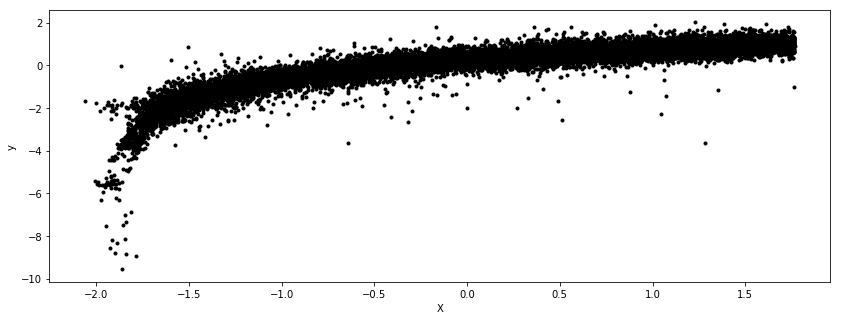

In [48]:
X = new_dt[:,0].reshape(-1, 1)
y = new_dt[:,1]

fig = plt.figure(figsize=(14,5))
plt.scatter(X, y, c='k', marker='.')

plt.xlabel('X')
plt.ylabel('y')
plt.show()

Selecting a subsample for illustration purposes (using indecs)

In [49]:
import random

minX = -1.5
maxX = 1.5
rand = 100

random.seed(134)
range_indcs = np.where( (X>minX) & (X<maxX) )[0]
sel_indcs = random.sample(list(range_indcs), rand)   # sample from the previous range

print(f'The full length of X is {len(X)} points,')
print(f'while there are {len(range_indcs)} in the range {minX}-{maxX}.')
print(f'We randomly select {rand} of them:')
print(sel_indcs)
print()


The full length of X is 21174 points,
while there are 18021 in the range -1.5-1.5.
We randomly select 100 of them:
[17974, 19666, 8225, 5863, 2513, 18041, 5329, 14507, 9045, 18221, 9872, 20925, 16896, 2649, 5074, 11135, 19336, 10752, 11672, 3907, 10314, 14297, 13487, 10226, 13520, 6318, 19604, 14612, 11163, 11562, 18738, 12509, 3251, 3872, 14671, 9013, 9744, 6214, 4940, 7523, 4880, 13402, 9343, 10357, 12216, 15696, 8286, 9994, 6759, 1664, 14730, 7660, 7911, 13942, 4524, 19933, 19022, 4098, 7119, 4107, 5235, 15079, 8952, 7696, 8409, 7172, 19676, 19120, 5153, 8154, 12265, 13509, 18869, 14347, 9212, 12127, 1635, 4291, 7088, 16009, 18417, 19425, 4587, 3111, 13198, 1214, 3465, 13220, 15437, 7659, 557, 9827, 17032, 9417, 10206, 18487, 3654, 2557, 21156, 17341]



In [50]:
# X_train, X_test, y_train, y_test = train_test_split(X[sel_indcs], y[sel_indcs],
#                         test_size=0.2) #, random_state=42) 

X_train, X_test, y_train, y_test = train_test_split(X[sel_indcs], y[sel_indcs],
                        test_size=0.3) #, random_state=42) 

print(f'- From {len(X)} sources:')
print(f'   {len(X_train)} (train)')
print(f'   {len(X_test)} (test)') 

- From 21174 sources:
   70 (train)
   30 (test)


Score for the training set: 0.7968
Score for the test set: 0.8270
Errors:
- MSE: 0.105
- RMSE: 0.324
- MAE: 0.265


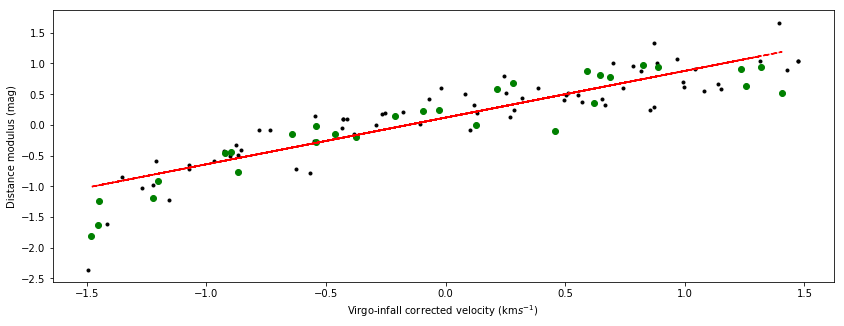

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(f'Score for the training set: {reg.score(X_train, y_train):0.4f}')
print(f'Score for the test set: {reg.score(X_test, y_test):0.4f}')

# find the parameters of the fit
# print(reg.coef_)
# print(reg.intercept_)

fig = plt.figure(figsize=(14,5))

plt.plot(X_train, y_train, 'k.', label='train')
plt.plot(X_test, y_test, 'go', label='test' ) 
plt.plot(X_test, y_pred, '--r', label='model' ) 

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print('Errors:')
print(f'- MSE: {mse:0.3f}')
print(f'- RMSE: {rmse:0.3f}')
print(f'- MAE: {mae:0.3f}')
      
pltlabels()
plt.show() 

-- iteration 1 with coef: 0.737144, and error: 0.141
-- iteration 2 with coef: 0.777230, and error: 0.088
-- iteration 3 with coef: 0.670417, and error: 0.219
-- iteration 4 with coef: 0.783197, and error: 0.094
-- iteration 5 with coef: 0.826378, and error: 0.084
-- iteration 6 with coef: 0.802290, and error: 0.078
-- iteration 7 with coef: 0.762169, and error: 0.141
-- iteration 8 with coef: 0.811828, and error: 0.074
-- iteration 9 with coef: 0.789540, and error: 0.110
-- iteration 10 with coef: 0.781765, and error: 0.076
0.11049640704741828


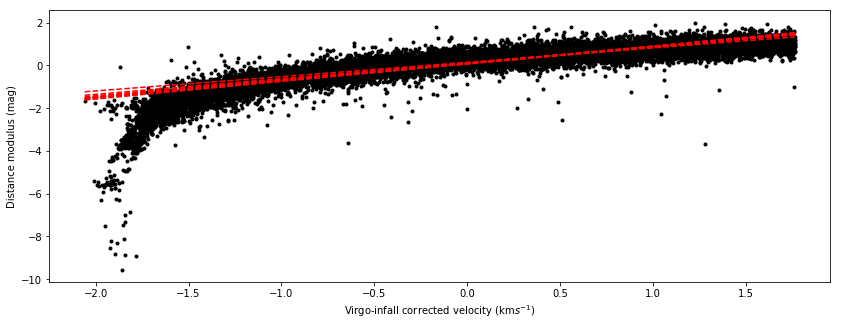

In [54]:
from collections import defaultdict
# err_dict = {
    
# }
errs = [] #defaultdict(list)

fig = plt.figure(figsize=(14,5))

# for improved illustration of the model
X_plot = np.linspace(min(X), max(X), 100)

plt.plot(X, y, 'k.')

for i in range(10):
    iX_train, iX_test, iy_train, iy_test = train_test_split(X[sel_indcs], y[sel_indcs],
                        test_size=0.3) 
#     iX_train, iX_test, iy_train, iy_test = train_test_split(X, y,
#                         test_size=0.3) 
    
    reg.fit(iX_train, iy_train)

    y_pred = reg.predict(iX_test)
    
    mse = mean_squared_error(iy_test, y_pred)
    rmse = mean_squared_error(iy_test, y_pred, squared=False)
    mae = mean_absolute_error(iy_test, y_pred)    

    errs.append(mse)
    
    plt.plot(X_plot , reg.predict(X_plot.reshape(-1,1)), '--r') 
#    plt.plot(iX_test, reg.predict(iX_test), '--r') 
#    plt.plot(iX_test, (Ridge(alpha=100).fit(iX_train, iy_train)).predict(iX_test.reshape(-1,1)), 'ob' )

    print(f'-- iteration {i+1} with coef: {reg.coef_[0]:0.6f}, and error: {mse:0.3f}')

    
#plt.plot(X[sel_indcs], y[sel_indcs], 'k.')

print(np.mean(np.asarray(errs)))

pltlabels()
plt.show() 
    

No handles with labels found to put in legend.


> Running ols with LinearRegression()
error: 0.806
> Running ridge with Ridge(alpha=0.001)
error: 0.709
> Running lasso with Lasso(alpha=0.001)
error: 0.733


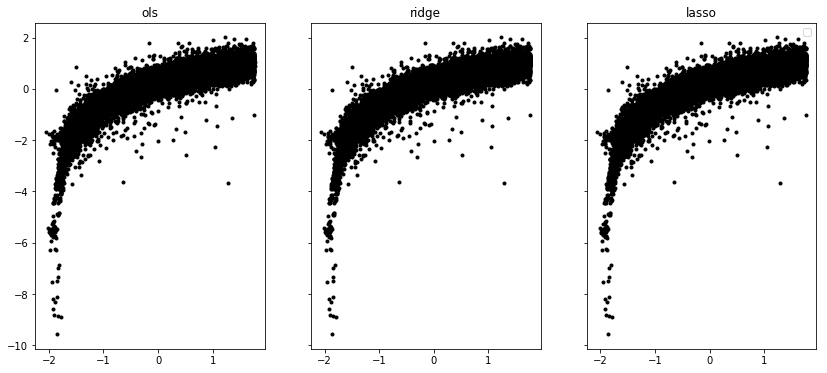

In [55]:
from collections import defaultdict
regressors_coefs = defaultdict(list)

regressors = dict(
    ols=LinearRegression(), ridge=Ridge(alpha=0.001), lasso=Lasso(alpha=0.001)
)
reg_slopes = {}

fig, axs = plt.subplots(1,3, sharey=True, figsize=(14,6))

iX_data = np.arange(min(X), max(X), 1000)

for k, ax in enumerate(axs.reshape(-1)):
    name = list(regressors.keys())[k]
    ireg = list(regressors.values())[k]
    print(f'> Running {name} with {ireg}')

    ax.plot(X, y, 'k.')
    
    errs = []
    for i in range(10):
        iX_train, iX_test, iy_train, iy_test = train_test_split(X[sel_indcs], 
                                                                y[sel_indcs],
                                                                test_size=0.3) 

        ireg.fit(iX_train, iy_train)
        iy_pred = ireg.predict(iX_test.reshape(-1, 1))
        
        errs.append(mean_absolute_error(iy_test, y_pred))
#        ax.plot(iX_test, iy_pred, '--r') 
        regressors_coefs[name].append(ireg.coef_[0])
        
        ax.plot(iX_data, ireg.predict(iX_data.reshape(-1,1)), '-r')         

    ax.plot(X[sel_indcs], y[sel_indcs], 'k.')
    ax.set_title(name)
    
    print(f'error: {np.mean(errs):0.3f}')
    
plt.legend()    
plt.show()    

### Question: What do you notice? 
<br>
<details>
<summary>Click for answer</summary>
The linear function does not fit the points here regardless the regularization (which might help in some cases).
    
So, not big differences, because the model (linear fit) is not good anyways. 

</details>

## Changing the model 

Since the simple linear model is not adequate let's tyr to fit a simply polynomial.

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures 

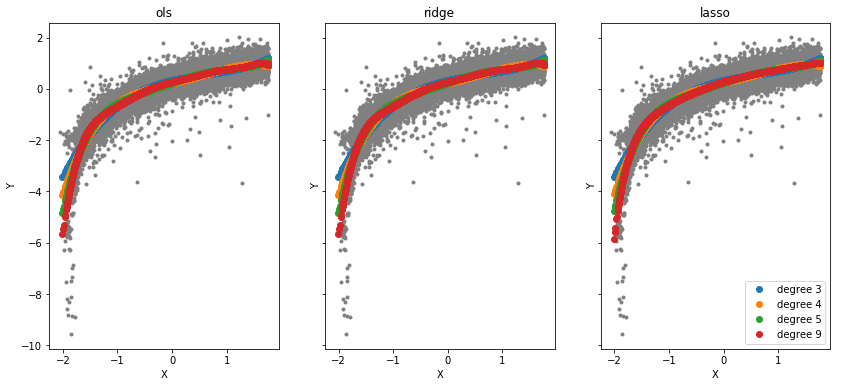

In [38]:
regressors = dict(
    ols=LinearRegression(), ridge=Ridge(alpha=0.001), lasso=Lasso(alpha=0.001)
)

X_train, X_test, y_train, y_test = train_test_split(X, y , 
                                                    test_size=0.3) 

fig, axs = plt.subplots(1,3, figsize=(14,6), sharey=True)

for k, ax in enumerate(axs.reshape(-1)):
    ax.plot(X, y, '.', color='gray')
    
    for degree in [3, 4, 5, 9]:
        model = make_pipeline(PolynomialFeatures(degree), list(regressors.values())[k])
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        ax.plot(X_test, y_pred, 'o',  label=f"degree {degree}")
        
        ax.set_title(list(regressors.keys())[k])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')

    
plt.legend()
plt.show()

### Question: Now what? 

<br>
<details>
<summary>Click for answer</summary>
Obviously a polynomial is a more capable model. 
Already Ridge is doing a great work especially with increasing orders. 
Lasso is actually penalizing the same all orders, so it offers the opprotunity to use a simpler model than ridge.  
</details>


# The more general linear regression

In the previous we have been thinking in terms of linearity on the coefficients and the variables. However, on the previous section we saw that it is possible to perform a linear regression with a polynomila, where the variables now are not linear any more. So, how come and the regression still works?

Linear regression refers to modeling functions that re linear with respect to the parameters (coefficients) and not with respect to the variables! For example, the function:

$$f (x|β) = \sum_{i=1}^N β_i g_i(x) = β_1 g_1(x) + β_2 g_2(x)~+~...~+~β_N g_N(x) $$

describes a linear problem as long as the sub-functions $g_i(x)$ do not depend on any of the parameters $β_i$. This is not the most generic formulation of the linear regression but we are going to use this form in the following applications.

## Benefits of machine learning regression

Ideally, we would like to use a theoretically-derived funtion which could describe the observed distribution of the data. By fitting its parameters to the data we could simply preform the regression (we have seen this e.g. in the Bayesian session). However this is not always possible because e.g. we might be facing a new problem or because we are simply not satisfied by the available options in the literature. 

Even if we do not know the intrinsic form, we can still mimic any function by using a model $f (x|β)$ composed of an arbitrary number of sub-functions. One common approach is to use "Basis Functions", i.e. expand $f(x)$ over a _specific_ "family" of functions $g_i(x)$, for example a series of Gaussians with different means and variances.

How many functions do we need? We do cannot decide that a priori. The more functions we use, the better the model will fit the data, but the number of parameters increases (i.e. the size of $β_i$) and so does the risk overfitting. 

That is exactly where Ridge and Lasso apply, since the penalize the individual functions  $g_i(x)$ (while Lasso can actually remove them as uneccesary).

## Application 2: HECATE with Gaussian kernel

We return again to the same dataset and we will use Gaussian functions as a kernel, i.e. we are going to convert all point to a Gaussian function. 

In [56]:
def gaussian_basis(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)

n_gaussians = 1000
centers = np.linspace(np.min(X), np.max(X), n_gaussians)
widths = 285

No handles with labels found to put in legend.


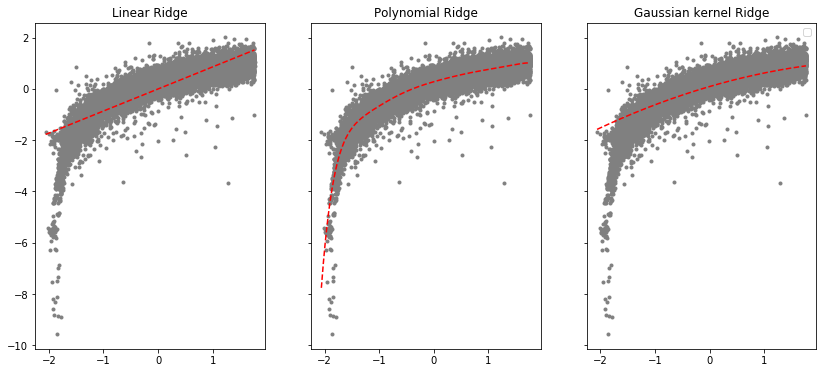

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR


# models = dict(
# #    LinearReg=LinearRegression(), 
#     Ridge= Ridge(alpha=0.001),
#     PolyRidge=make_pipeline(PolynomialFeatures(9), Ridge(alpha=0.001)),
# #    GaussRidge=make_pipeline( gaussian_basis(X[:, np.newaxis], centers, widths), Ridge(alpha=0.001))
    
# )

X_plot = np.linspace(np.min(X), np.max(X), 1000)[:, None]


X_train, X_test, y_train, y_test = train_test_split(X, y , 
                                            test_size=0.3, random_state=42) 

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,6), sharey=True)



# text = ['Straight-line Regression',
#         '4th degree Polynomial\n Regression',
#         'Gaussian Basis Function\n Regression',
#         'Gaussian Kernel\n Regression']

# # number of constraints of the model.  Because
# # Nadaraya-watson is just a weighted mean, it has only one constraint
# n_constraints = [2, 5, len(basis_mu) + 1, 1]
# n_constraints = [2, 10, len(X_plot)+1]
# chi2_dof = (np.sum(((mu_sample_fit - mu_sample) / dmu) ** 2)
#                 / (len(mu_sample) - n_constraints[i]))


# Model 1: 
ax1. plot(X,y, '.', color='gray')
mdl1 =  Ridge(alpha=0.001)
#mdl1 = list(models.values())[0]
mdl1.fit(X_train, y_train)
#ax1.plot(X_test, mdl1.predict(X_test), 'o')
ax1.plot(X_plot, mdl1.predict(X_plot), '--r')
ax1.set_title('Linear Ridge')

# kr = GridSearchCV(
#     KernelRidge(kernel="rbf", gamma=0.1),
#     param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3], "gamma": np.logspace(-2, 2, 5)},
# )

# Model 2
ax2.plot(X,y, '.', color='gray')
mdl2 = make_pipeline(PolynomialFeatures(9), Ridge(alpha=0.001)) #list(models.values())[1]
mdl2.fit(X_train, y_train)
#ax2.plot(X_test, mdl2.predict(X_test), 'o')
ax2.plot(X_plot, mdl2.predict(X_plot), '--r')
ax2.set_title('Polynomial Ridge')


# # Model 3
# ax3. plot(X,y, '.', color='gray')
# mdl3 = Ridge(alpha=0.001)
# gX_train = gaussian_basis(X_train, centers, widths)
# mdl3.fit( gX_train , y_train)
# gX_test = gaussian_basis(X_test, centers, widths)
# ax3.plot( X_test, mdl3.predict(gX_test), 'o')

from sklearn.kernel_ridge import KernelRidge

# Model 3
ax3. plot(X,y, '.', color='gray')
mdl3 = Ridge(alpha=0.001)
gX_train = gaussian_basis(X_train, centers, widths)
mdl3.fit( gX_train , y_train)
gX_test = gaussian_basis(X_test, centers, widths)
#ax3.plot( X_test, mdl3.predict(gX_test), 'o')

gX_plot = gaussian_basis(X_plot, centers, widths)
ax3.plot( X_plot, mdl3.predict( gX_plot ), '--r')
ax3.set_title('Gaussian kernel Ridge')

# mdl3 = GridSearchCV(
#     KernelRidge(kernel="rbf"),
#     param_grid={"alpha": [1e-2], "gamma": [0.01]} #np.logspace(-2, 2, 5)},

#     #param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3], "gamma": np.logspace(-2, 2, 5)},
# )

# mdl3.fit(X_train, y_train)
# kr_fit = time.time() - t0
# print(f"Best KRR with params: {kr.best_params_} and R2 score: {kr.best_score_:.3f}")
# print(f"KRR complexity and bandwidth selected and model fitted in {kr_fit:0.3f}s")
# #mdl3 = KernelRidge(kernel="rbf", gamma=0.1)
# mdl3_pre = mdl3.predict(X_plot)
# kr_predict = time.time() - t0
# print(f"KRR prediction for {X_plot.shape[0]:d} inputs in {kr_predict:.3f}s")

# ax3.plot(X_plot, mdl3_pred, '--r')



# for ax in plt.gca(): 
#     pritn(ax)
# ax1.set_title(name)
#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
# for ax in axes.flat:
#     print(ax)

#plt.ylimit(0,40)
plt.legend()
plt.show()    
    


In [85]:
import random

random.seed(134)
sel_Xinds = random.sample(range(len(X)), 250)

print(f'Selecting {len(sel_Xinds)} from the full length of {len(X)} points.')
#print(sel_Xinds)
XX = X[sel_Xinds]
yy = y[sel_Xinds]

gXX = gaussian_basis(XX, centers, widths)

X_plot = np.linspace(np.min(X), np.max(X), 100)[:, None]
gX_plot = gaussian_basis(X_plot, centers, widths)

Selecting 250 from the full length of 21174 points.


-- working with Linear_Regression
[ 3.87326588e+13 -4.82238132e+13 -1.45420721e+13 -2.87914746e+13
  1.76486673e+13  1.76422745e+13  1.53272030e+13  1.40454142e+13
  1.50741607e+13  2.50452270e+13]
-- working with Ridge_Regression
[ 2.45125207  2.15070846  1.83509838  1.50738471  1.1708198   0.82891107
  0.48538036  0.14411718 -0.19087344 -0.51552805]
-- working with Lasso_Regression


/home/grigoris/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09883596598555755, tolerance: 0.08538267146734403
  positive)


[ 0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]


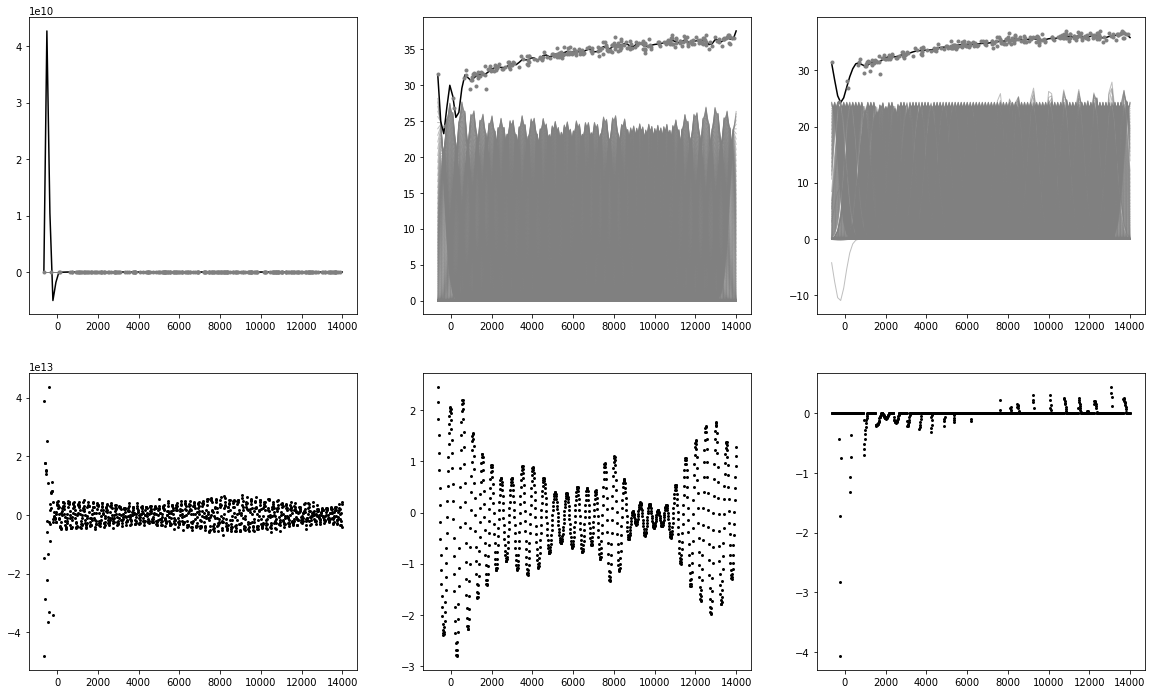

In [87]:
models = dict(    
    Linear_Regression = LinearRegression(), 
    Ridge_Regression  = Ridge(alpha=0.001),
    Lasso_Regression  = Lasso(alpha=0.001, max_iter=2000) # positive=True
) 

fig = plt.figure(figsize=(20, 12))
#fig = plt.subplots(1,3, figsize=(14,6), sharey=True)


for i in range(3):
    name = list(models.keys())[i]
    clf = list(models.values())[i] #classifier[i](fit_intercept=False, **kwargs[i])
    print(f'-- working with {name}')
    clf.fit(gXX, yy)
    w = clf.coef_

    print(w[:10])
    fit = clf.predict( gX_plot)
    
    # plot fit
    ax = fig.add_subplot(231 + i)
#     ax.xaxis.label.set_size(20)
#     ax.yaxis.label.set_size(20)
#     ax.tick_params(axis='both', which='major', labelsize=20)
#     ax.xaxis.set_major_formatter(plt.NullFormatter())

#     # plot curves for regularized fits
#     if i == 0:
#         ax.set_ylabel('$f_{v}$ [Jy]')
#     else:
#         ax.yaxis.set_major_formatter(plt.NullFormatter())
    axis_ymin, axis_ymax = min(yy), max(yy)
    w_plot = (0.3 * w / max(w)) * (axis_ymax - axis_ymin) + axis_ymin
    curves = w_plot * gX_plot

    ax.plot(X_plot, curves, c='gray', lw=1, alpha=0.5)

    
#     # NOTE: converting map to list or else plotting won't work
    
    ax.plot(X_plot, fit, '-k')
    
    ax.plot(XX,yy, '.', color='gray')

#    ax.scatter(X_plot, y, fmt='.k', ecolor='gray', lw=1, ms=4)
#     ax.set_xlim(np.min(wave),np.max(wave))
#     ax.set_ylim(np.min(flux),np.max(flux))
#     ax.text(0.05, 0.93, labels[i],
#             size=20,
#             ha='left', va='top',
#             bbox=dict(boxstyle='round', ec='k', fc='w'),
#             transform=ax.transAxes) 
    
  
    
#     # plot weights
    ax = plt.subplot(234 + i)
#     ax.xaxis.label.set_size(20)
#     ax.yaxis.label.set_size(20)
#     ax.tick_params(axis='both', which='major', labelsize=20)
#     #ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
#     ax.set_xlabel('$\lambda$ [A]')
#     if i == 0:
#         ax.set_ylabel(r'$\theta$')
#         w *= 1E-12
#         ax.text(0, 1.01, r'$\rm \times 10^{12}$',
#                 transform=ax.transAxes)
    ax.scatter(centers, w, s=9, lw=0, c='k')

#     ax.set_xlim(np.min(centers), np.max(centers))

#     ax.set_ylim(np.min(w), np.max(w))

#     ax.text(0.05, 0.93, labels[i],
#             size=20,
#             ha='left', va='top',
#             bbox=dict(boxstyle='round', ec='k', fc='w'),
#             transform=ax.transAxes)

plt.show()

# Application 3: Use regression to fit and subtract galaxy continuum

In previous sessions (e.g. Introduction and MCMC) we have explored some methods to fit spectral lines.
In this exercise, we want to isolate the spectral emission lines of a late-type galaxy (e.g. a spiral) by removing the stellar continuum from the spectrum. This procedure represents a very common step in the spectral data reductions, and it is performed through a variety of methods. The simplest approaches focus on a line at a time, removing only the local continuum by fitting it e.g. with a polynomial. Sophisticated methods fit the whole spectrum using appropriate stellar population templates. Here we will use linear regression as a quick method to obtain a fast continuum subtraction without dealing with detailed tuning.

We will use an optical spectrum from SDSS from the
[Spectral cross-correlation templates](http://classic.sdss.org/dr5/algorithms/spectemplates/)

--- 

**TASK 1**: Use the Gaussian Basis expansion and the Ridge/LASSO regularization to fit the spectrum

HINT: Try to run the regression with the full spectrum, and then removing the features we are most interested in isolating.

**TASK 2**: Compare your results with the background-subtracted spectrum distributed along with the SDSS data

## Loading the SDSS spectrum

In [8]:
# LOADING THE SDSS SPECTRUM
#
# To understand the SDSS file format, consult:
#   http://www.sdss2.org/dr3/dm/flatFiles/spSpec.html

# FITS manipulation:
from astropy.io import fits

PATH_spectrum = "data/late-type.fits"
    
hdulist = fits.open(PATH_spectrum)
data = hdulist[0].data
# Header keywords to perform wavelength calibration:
coeff0 = hdulist[0].header['coeff0']
coeff1 = hdulist[0].header['coeff1']
spectrum_flux  = data[0] # observed spectrum
spectrum_noBG  = data[1] # contimuum-subtracted spectrum
hdulist.close()

spectrum_flux = spectrum_flux[:-100]
spectrum_noBG = spectrum_noBG[:-100]
# NOTE: Removing last 100 data points, which are bogus

# Creating arbitrary uncertainty array proportional to the flux:
spectrum_flux_err = spectrum_flux * np.random.uniform(0.01, 0.1, size=len(spectrum_flux))

# Creating wavelength array using header calibrations:
spectrum_wave = 10.0 ** (coeff0 + coeff1 * np.arange(len(spectrum_flux)))

## Plotting the spectrum

In plotting, we will highlight 2 strong lines in the spectrum

In [9]:
# Defining ranges of strong features:
#   http://astronomy.nmsu.edu/drewski/tableofemissionlines.html
feature_0 = [6550, 6580] # H_alpha 6562.819
feature_1 = [6710, 6750] # SII 6730.810
# wavelength min and max for each feature [A]

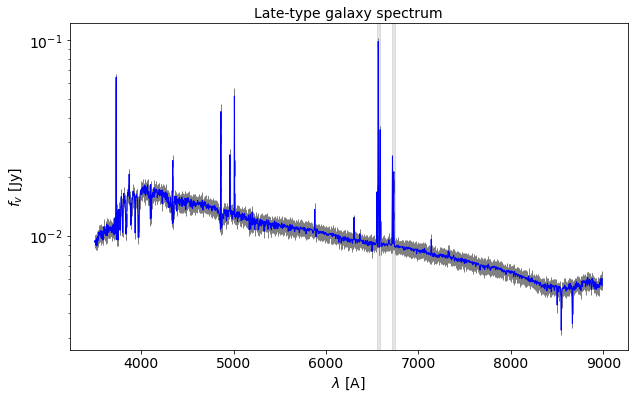

In [23]:
# > Displaying spectrum:    
fig = plt.figure(figsize=(10, 6))
# fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0, left=0.1, right=0.95, wspace=0.4)

# ax = plt.subplot(111)

plt.title('Late-type galaxy spectrum', fontsize=14)

plt.xlabel('$\lambda$ [A]', fontsize=14)
plt.ylabel('$f_{v}$ [Jy]',  fontsize=14)
#
plt.yscale('log')

plt.gca().tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.gca().tick_params(axis = 'both', which = 'minor', labelsize = 14)

plt.errorbar(spectrum_wave, spectrum_flux, spectrum_flux_err, fmt='blue', ecolor='gray', lw=1, ms=4)

# Marking emission features:
plt.axvspan(feature_0[0], feature_0[1] , color='grey', alpha=0.2)
plt.axvspan(feature_1[0], feature_1[1],  color='grey', alpha=0.2)

plt.show()

## Using the Gaussian Basis expansion and the Ridge/LASSO regularization to fit the spectrum


In [11]:
# REMOVING FEATURES FROM DATA
#
# We remove the wavelength ranges corresponding to the features we want to isolate,
# to avoid that some of the Gaussians in the Gaussian Basis attempt to fit the features

valid_range = (((spectrum_wave < feature_0[0] ) | (spectrum_wave > feature_0[1])) &
               ((spectrum_wave < feature_1[0] ) | (spectrum_wave > feature_1[1])))
wave        = spectrum_wave[valid_range]
flux        = spectrum_flux[valid_range]
flux_err    = spectrum_flux_err[valid_range]

# Restore feature ranges in data:
# wave        = spectrum_wave
# flux        = spectrum_flux
# flux_err    = spectrum_flux_err

In [12]:
# MODEL PARAMETERS:

# Manually converting data to a gaussian basis:
def gaussian_basis(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)

n_gaussians = 100
centers = np.linspace(np.min(wave), np.max(wave), n_gaussians)
widths = 200

X = gaussian_basis(wave[:, np.newaxis], centers, widths)

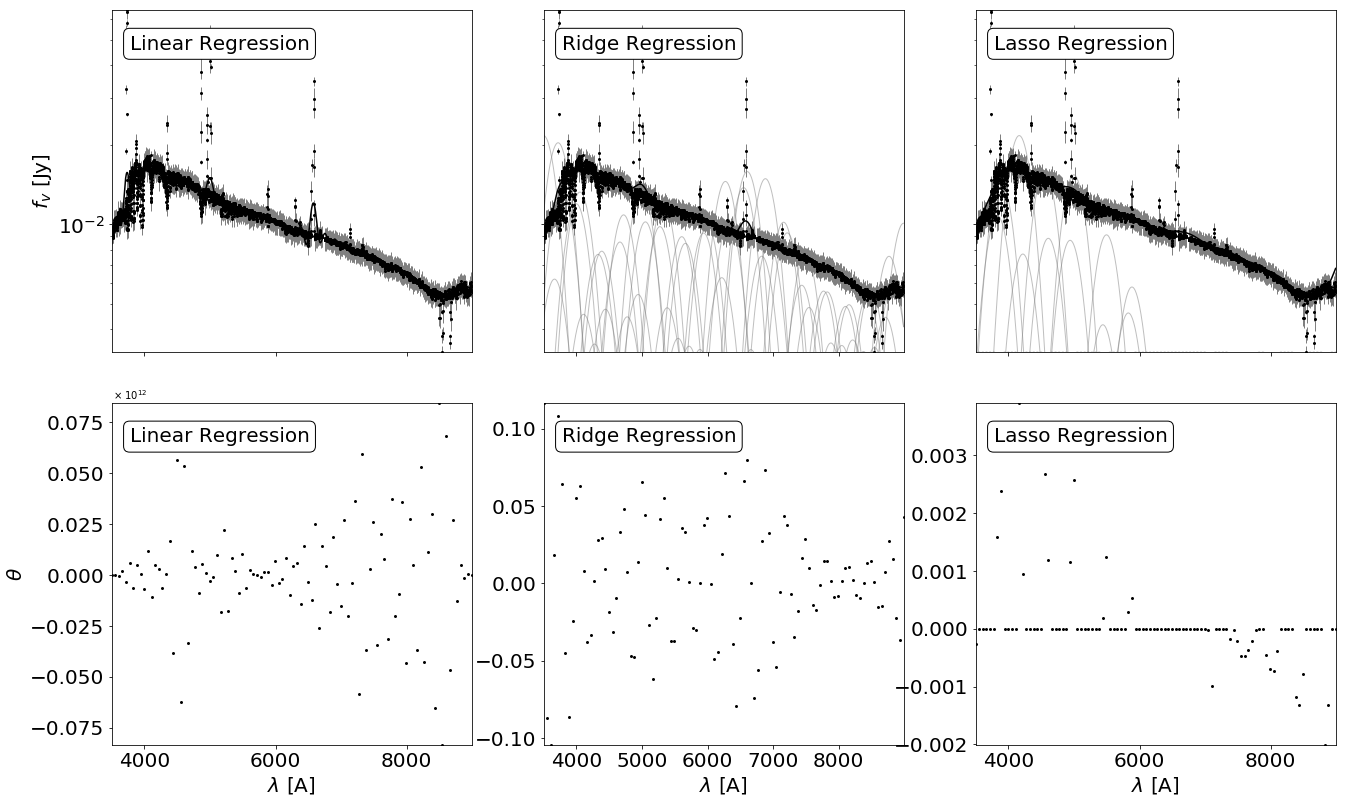

In [18]:
# NOTE: Most of the code in this block represents an edited version of:
# http://www.astroml.org/book_figures/chapter8/fig_rbf_ridge_mu_z.html#book-fig-chapter8-fig-rbf-ridge-mu-z

from sklearn.linear_model import LinearRegression, Ridge, Lasso

# sampled array for plotting purposes
x_plot = np.linspace(np.min(wave), np.max(wave), 1000)

fig = plt.figure(figsize=(20, 12))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, hspace=0.15, wspace=0.2)

classifier = [LinearRegression, Ridge, Lasso]
kwargs = [dict(), dict(alpha=0.00005), dict(alpha=0.00001)]
labels = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']


for i in range(3):
    clf = classifier[i](fit_intercept=True, **kwargs[i])
    clf.fit(X, flux)
    w = clf.coef_
    fit = clf.predict(gaussian_basis(x_plot[:, None], centers, widths))
   
    # plot fit
    ax = fig.add_subplot(231 + i)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    #
    ax.set_yscale('log')

    # plot curves for regularized fits
    if i == 0:
        ax.set_ylabel('$f_{v}$ [Jy]')
    else:
        ax.yaxis.set_major_formatter(plt.NullFormatter())
        axis_ymin, axis_ymax = min(flux), max(flux)
        w_plot = (0.3 * w / max(w)) * (axis_ymax - axis_ymin) + axis_ymin
        curves = w_plot * gaussian_basis(x_plot[:, np.newaxis], centers, widths)

        ax.plot(x_plot, curves, c='gray', lw=1, alpha=0.5)
    
    # NOTE: converting map to list or else plotting won't work
    
    ax.plot(x_plot, fit, '-k')

    ax.errorbar(wave, flux, flux_err, fmt='.k', ecolor='gray', lw=1, ms=4)
    ax.set_xlim(np.min(wave),np.max(wave))
    ax.set_ylim(np.min(flux),np.max(flux))
    ax.text(0.05, 0.93, labels[i],
            size=20,
            ha='left', va='top',
            bbox=dict(boxstyle='round', ec='k', fc='w'),
            transform=ax.transAxes)
    
    
    # plot weights
    ax = plt.subplot(234 + i)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    #ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax.set_xlabel('$\lambda$ [A]')
    if i == 0:
        ax.set_ylabel(r'$\theta$')
        w *= 1E-12
        ax.text(0, 1.01, r'$\rm \times 10^{12}$',
                transform=ax.transAxes)
    ax.scatter(centers, w, s=9, lw=0, c='k')

    ax.set_xlim(np.min(centers), np.max(centers))

    ax.set_ylim(np.min(w), np.max(w))

    ax.text(0.05, 0.93, labels[i],
            size=20,
            ha='left', va='top',
            bbox=dict(boxstyle='round', ec='k', fc='w'),
            transform=ax.transAxes)

plt.show()

## Comparing background subtraction with SDSS results

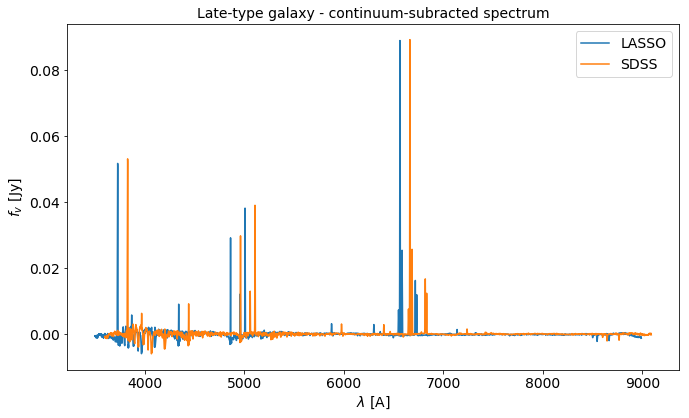

In [19]:
# RESAMPLING LASSO FITTED CURVE TO DATA
#
# In order to plot the fitting curve produced by the classifier ("fit")
#   along with "spectrum_flux", we first resample it to the same
#   array, i.e. "sample_wave"
# This is because "fit" has been sampled on "x_plot", which has
#   a different sampling than "spectrum_wave"

from scipy.interpolate import interp1d

clf = classifier[2](fit_intercept=True, **kwargs[i]) # LASSO
clf.fit(X, flux)

fit = clf.predict(gaussian_basis(x_plot[:, None], centers, widths))

f = interp1d(x_plot, fit, kind='cubic')
# interpolation function
# - linear
# - quadratic
# - cubic
fit_interp = f(spectrum_wave) 


# PLOTTING

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# > Displaying spectrum:    
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0, left=0.1, right=0.95, wspace=0.4)

ax = plt.subplot(111)

ax.set_title('Late-type galaxy - continuum-subracted spectrum', fontsize=14)

ax.set_xlabel('$\lambda$ [A]', fontsize=14)
ax.set_ylabel('$f_{v}$ [Jy]', fontsize=14)

ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 14)

ax.plot(spectrum_wave,     spectrum_flux - fit_interp, label='LASSO')
ax.plot(spectrum_wave+100, spectrum_noBG,              label='SDSS')

ax.legend(fontsize=14)

plt.show()

NOTE: The SDSS spectrum have been arbitrarily shifted for presentation purposes